# Breast Cancer Wisconsin (Diagnostic) Data Set 
## Data Classification 

As repeated in the Data Exploration - Part I kernel, I will be exploring the Breast Cancer Wisconsin Data Set obtained through [Kaggle](https://www.kaggle.com/uciml/breast-cancer-wisconsin-data), which is also available on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29).

According to the repository, this data set contains features computed from digitized images of cells extracted by a fine needle aspirate of a breast mass.  Each feature is a characteristic measured from the cell nuclei of cell masses from 569 patients.  The overall goal of this analysis is to train a learning algorithm that will be able to accurately classify cells into malignant and benign classes.


There are 32 features in total within this dataset, with one of them being the target feature (diagnosis).  

**Variable descriptions: **
 * 1) ID number 
 * 2) Diagnosis (M = malignant, B = benign) 
 * 3) - 32) For each of the following characteristics, 3 measurements (**mean**, **se**, **worst**) were computed for each cell nuclei:

    * radius (mean of distances from center to points on the perimeter) 
    * texture (standard deviation of gray-scale values) 
    * perimeter 
    * area 
    * smoothness (local variation in radius lengths) 
    * compactness (perimeter^2 / area - 1.0) 
    * concavity (severity of concave portions of the contour) 
    * concave points (number of concave portions of the contour) 
    * symmetry 
    * fractal dimension ("coastline approximation" - 1)

    The **mean**, **standard error** and "**worst**" or largest (mean of the three largest values) of these features were computed, resulting in 30 additional features. 

### Import Libraries

In [353]:
import numpy as np 
import pandas as pd
import seaborn as sns  
import matplotlib.pyplot as plt 
%matplotlib inline

import os
print(os.listdir("../Breast-Cancer-Wisconsin-Dataset/"))

[' Breast Cancer Wisconsin Data Set - Classification (Part II).ipynb', ' Breast Cancer Wisconsin Data Set - Exploration (Part I) .ipynb', '.git', '.ipynb_checkpoints', 'data.csv', 'README.md']


### Preprocess Data

In [354]:
data = pd.read_csv('data.csv')
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


As mentioned in the Part I notebook: 
* 1) All features except `id`, `diagnosis`, and `Unnamed: 32` are non-null floating point numbers
* 2) `diagnosis` is an object variable containing two values: M or B, and will need to be converted to binary 
* 3) `id` is just an identification number, and is unlikely to hold any predictive power, and so should be dropped
* 4) `Unnamed: 32` is a column of NaN values, and so should be dropped

Here I set the target feature as `y` and binarize them into 1 and 0. I also set the features I will use to classify this data as `x`.  Finally, I drop the uninformative columns: `id`, `diagnosis`, `Unnamed: 32` from `x`.

In [7]:
# define x columns, drop 'id' and 'Unnamed: 32' columns 
x = data.drop(['id', 'diagnosis', 'Unnamed: 32'], axis = 1)

# binarize y column 
from sklearn import preprocessing

y = data.diagnosis
lb = preprocessing.LabelBinarizer()
y = pd.DataFrame(data = lb.fit_transform(y), 
                 columns = ['diagnosis'])


Next, I split this data into both training and test sets using sklearn's `train_test_split` which will randomly segregate 30% of the data as the test set, and the remaining 70% for the training set.  The training set will be used to train my learning algorithm, while the test set will be stored away for validating the generalization accuracy of the model that we choose. 

In [8]:
# Split into training and test sets
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, 
                                                    y, 
                                                    test_size = 0.3, 
                                                    random_state = 42)


In [9]:
y_train.head()

,diagnosis
149,0
124,0
421,0
195,0
545,0


As with the Part I, I use `StandardScaler()` to normalize and scale my data.  Data leakage is unexpected introduction of information from test data into training data that influence the model to yield an overconfident generalization error. 

To prevent data leakage, I split my data into training and test set before feeding the training and test set to the scaler accordingly.  

In [25]:
# Scale data 
from sklearn.preprocessing import StandardScaler

stdsc = StandardScaler()
x_train_scaled = pd.DataFrame(stdsc.fit_transform(x_train), 
                              columns = x_train.columns)

x_test_scaled = pd.DataFrame(stdsc.fit_transform(x_test),
                             columns = x_test.columns)

In [26]:
x_train_scaled.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,-0.123490,-0.296801,-0.170507,-0.208616,-1.201680,-0.773170,-0.762312,-0.933241,-1.229949,-0.948166,...,-0.197620,-0.506748,-0.307910,-0.273576,-1.507424,-0.449260,-0.572239,-0.840822,-0.856362,-0.765748
1,-0.228268,-0.657951,-0.253775,-0.296503,-1.804637,-0.587616,-0.091985,-0.542684,-1.419985,-0.612491,...,-0.422917,-0.458495,-0.465287,-0.438127,-1.273017,0.027042,0.318045,-0.377067,-1.341582,-0.414807
2,0.145534,-1.230564,0.245833,-0.010242,0.519184,1.570006,0.732320,0.386583,1.054201,1.574228,...,0.036022,-1.192272,0.203869,-0.127445,-0.024877,0.770802,0.272612,-0.047627,-0.089971,0.488264
3,-0.358532,-0.672207,-0.400937,-0.400014,-1.203862,-0.970650,-0.634704,-0.654992,0.096572,-0.827986,...,-0.502189,-0.583287,-0.501000,-0.493386,-0.959895,-0.663496,-0.470142,-0.493515,0.226547,-0.802899
4,-0.157472,0.967224,-0.208843,-0.241538,-0.254695,-0.700630,-0.750349,-0.637469,-0.518248,-0.642882,...,-0.195534,0.596414,-0.296107,-0.266734,-0.442374,-0.656085,-0.835138,-0.659802,-0.387208,-0.800613


### Testing Different Classifiers

Next I run a quick comparison of different classifiers using sklearn's `cross_val_score` which will separate the data into `k` portions, train the data on `k-1` portions, and test on the remaining portion.  I feed in only the training set (`x_train_scaled` and `y_train`), and set aside the test set for final testing at the end of this notebook. 

I compared the following models: 
   * Logistic Regression:
       * logistic regression is a linear classification model which models the relationship of a categorical dependent variable and independent variable(s) by measuring probabilities of a particular outcome using a logistic function
       * `LogisticRegressionCV` has built-in cross validation for optimizing parameter C and also L2 regularization
       
      
   * Decision Tree: 
       * decision trees are another type of classification model that predicts the value of a target variable by learning simple decision rules
       
       
   * Random Forest: 
        * random forest fits a number of decision trees on subsets of the data and uses averaging to yield a model with improved predictive accuracy and that is less prone to overfitting
        
        
   * SVM: 
       * support vector machines are another type of classification model that has the versatility of learning non-linear boundaries by specifying a kernel
       * given the relatively small training set and the small feature space, I opted to use a Gaussian kernel

In [27]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

clf = {'logisticregression_l2': LogisticRegressionCV(), 
       'decisiontree': DecisionTreeClassifier(), 
       'randomforest': RandomForestClassifier(),
       'svcgaussian': SVC(kernel = 'rbf')}

# averages cross validation scores across different models 
scores = {}
for key, model in clf.items(): 
    s = cross_val_score(model, 
                        x_train_scaled.values, 
                        y_train.values.ravel(), 
                        cv = 4, 
                        scoring = 'accuracy')
    scores[key] = np.mean(s)
    
scores



{'decisiontree': 0.9194919491949195,
 'logisticregression_l1': 0.97232223222322234,
 'randomforest': 0.94974497449744977,
 'svcgaussian': 0.97484748474847482}

#### Train a SVM classifier and optimize hyperparameters 

In [96]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, f_classif

selectK = SelectKBest(f_classif)
clf = SVC(kernel = 'rbf')

steps = [('feature_selection', selectK), 
         ('SVC', clf)]

pipe = Pipeline(steps)

parameters = {'feature_selection__k': np.arange(1,30,5), 
              'SVC__C': np.logspace(-3,4, num = 8), # C = [1e-3,..,1e4]
              'SVC__gamma': np.logspace(-3,4, num = 8)} # gamma same as C

cv = GridSearchCV(pipe, param_grid = parameters)

In [97]:
cv.fit(x_train_scaled, y_train.values.ravel())

GridSearchCV(cv=None, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('feature_selection', SelectKBest(k=10, score_func=<function f_classif at 0x000001FE494D1A60>)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'feature_selection__k': array([ 1,  6, 11, 16, 21, 26]), 'SVC__C': array([  1.00000e-03,   1.00000e-02,   1.00000e-01,   1.00000e+00,
         1.00000e+01,   1.00000e+02,   1.00000e+03,   1.00000e+04]), 'SVC__gamma': array([  1.00000e-03,   1.00000e-02,   1.00000e-01,   1.00000e+00,
         1.00000e+01,   1.00000e+02,   1.00000e+03,   1.00000e+04])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [98]:
y_predict = cv.predict(x_test_scaled)

In [101]:
cv.best_params_

{'SVC__C': 10.0, 'SVC__gamma': 0.01, 'feature_selection__k': 21}

In [102]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

ac = accuracy_score(y_test, y_predict)
ac 

0.98830409356725146

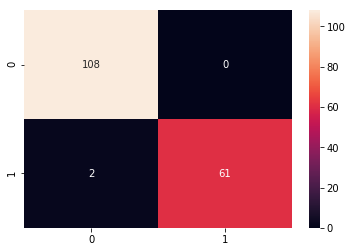

In [103]:
cm = confusion_matrix(y_test, y_predict)
sns.heatmap(cm, annot = True, fmt = 'd'); 

In [104]:
from sklearn.metrics import classification_report

report = classification_report(y_test, y_predict)
print(report)

             precision    recall  f1-score   support

          0       0.98      1.00      0.99       108
          1       1.00      0.97      0.98        63

avg / total       0.99      0.99      0.99       171



In [109]:
C = cv.best_params_['SVC__C']
gamma = cv.best_params_['SVC__gamma']
k = cv.best_params_['feature_selection__k']

In [110]:
print (C, gamma, k)

10.0 0.01 21


In [170]:
y_blah = (y_train['diagnosis'] == 1).astype(int)

In [176]:
correlations_blah = x_train.corrwith(y_blah)
correlations_blah.map(abs).sort_values()

texture_se                 0.021392
fractal_dimension_mean     0.032082
symmetry_se                0.033383
smoothness_se              0.049268
fractal_dimension_se       0.060112
concavity_se               0.249660
compactness_se             0.271625
fractal_dimension_worst    0.290516
symmetry_mean              0.351107
smoothness_mean            0.357168
concave points_se          0.394745
smoothness_worst           0.405991
texture_mean               0.406121
symmetry_worst             0.433798
texture_worst              0.455530
area_se                    0.512069
perimeter_se               0.529007
radius_se                  0.545140
compactness_worst          0.581583
compactness_mean           0.582411
concavity_worst            0.674592
area_mean                  0.688087
concavity_mean             0.691392
radius_mean                0.712933
area_worst                 0.715231
perimeter_mean             0.726666
radius_worst               0.761693
perimeter_worst            0

In [ ]:
fields_blah = list(correlations_blah.map(abs).sort_values().iloc[-2:].index)
fields_blah

In [156]:
y_int = (data['diagnosis'] == 'M').astype(int)

In [160]:
correlations = x.corrwith(y_int)

In [166]:
correlations = correlations.map(abs).sort_values()
correlations

symmetry_se                0.006522
texture_se                 0.008303
fractal_dimension_mean     0.012838
smoothness_se              0.067016
fractal_dimension_se       0.077972
concavity_se               0.253730
compactness_se             0.292999
fractal_dimension_worst    0.323872
symmetry_mean              0.330499
smoothness_mean            0.358560
concave points_se          0.408042
texture_mean               0.415185
symmetry_worst             0.416294
smoothness_worst           0.421465
texture_worst              0.456903
area_se                    0.548236
perimeter_se               0.556141
radius_se                  0.567134
compactness_worst          0.590998
compactness_mean           0.596534
concavity_worst            0.659610
concavity_mean             0.696360
area_mean                  0.708984
radius_mean                0.730029
area_worst                 0.733825
perimeter_mean             0.742636
radius_worst               0.776454
concave points_mean        0

In [168]:
fields = list(correlations.iloc[-2:].index)
fields 

['perimeter_worst', 'concave points_worst']

In [209]:
x_axis, y_axis = np.arange(-2, 5, 0.05), np.arange(-2, 5, 0.05)
xx, yy = np.meshgrid(x_axis, y_axis)
xx_ravel = xx.ravel()
yy_ravel = yy.ravel()
X_grid = pd.DataFrame([xx_ravel, yy_ravel]).T

In [210]:
X = data[fields]

scaler = StandardScaler()
X = scaler.fit_transform(X) 
X = pd.DataFrame(X, columns = fields)

In [211]:
clf_opt = SVC(kernel = 'rbf', C = C, gamma = gamma)
clf_opt.fit(X, y_int)

SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [212]:
y_grid_predictions = clf_opt.predict(X_grid)

In [213]:
y_grid_predictions = y_grid_predictions.reshape(xx.shape)


In [220]:
y_color = y_int.map(lambda r: 'red' if r == 1 else 'yellow')
y_color.head()

0    red
1    red
2    red
3    red
4    red
Name: diagnosis, dtype: object

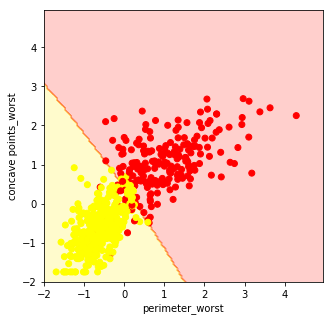

In [280]:
fig, ax = plt.subplots(figsize = (5,5))
ax.contourf(xx, yy, y_grid_predictions, cmap = plt.cm.autumn_r, alpha = 0.2);
ax.scatter(X.iloc[:,0], X.iloc[:,1], color = y_color, label = y_color);
ax.set(xlabel = fields[0], ylabel = fields[1]);


In [325]:
data_new = pd.concat([X, y_color], axis = 1) 

In [330]:
mask = data_new.diagnosis == 'red'

In [339]:
m = data_new[mask]
b = data_new[~mask]

In [ ]:
fig3, ax3 = plt.subplots(figsize = (5,5))

m1 = ax3.scatter(m.iloc[:,0], m.iloc[:,1], color = 'red', label = 'M')
b1 = ax3.scatter(b.iloc[:,0], b.iloc[:,1], color = 'yellow', label = 'B')
ax3.legend();